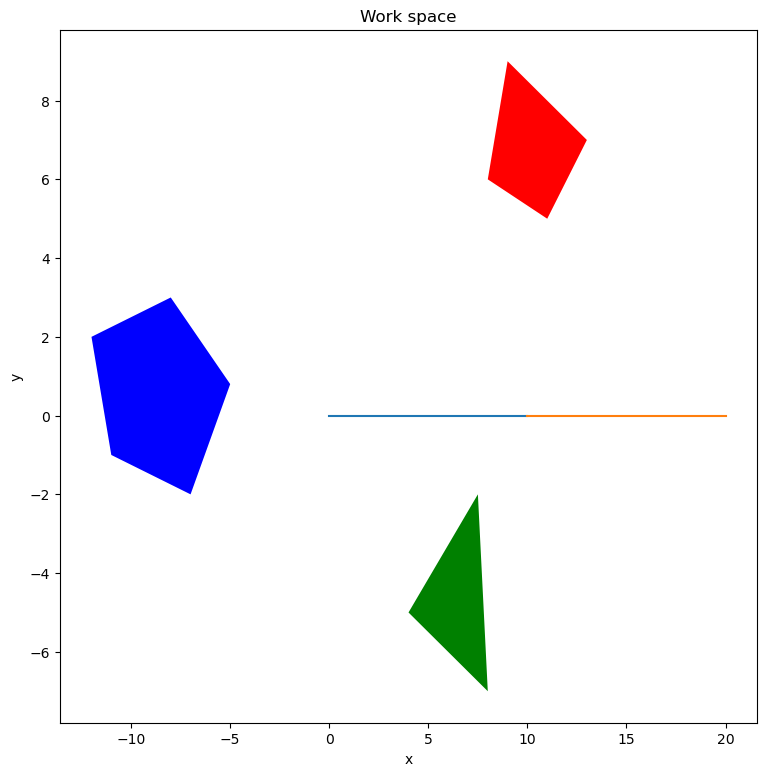

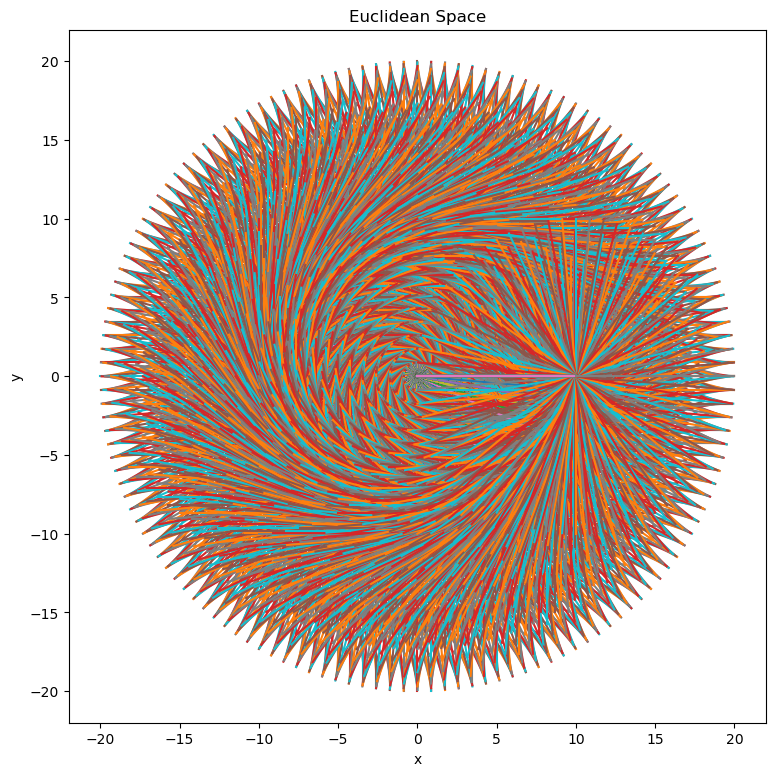

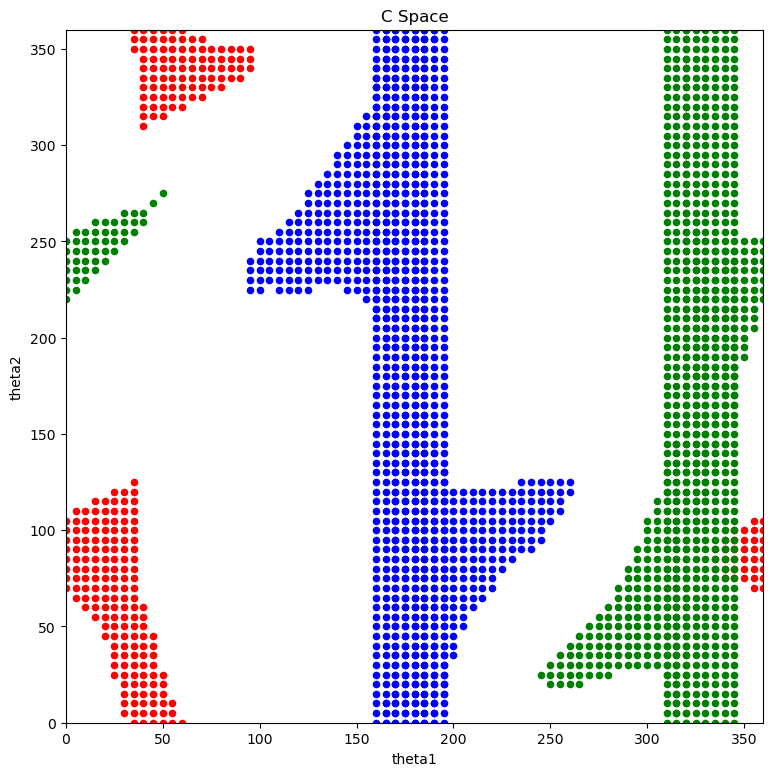

In [1]:
import numpy as np                                                    # Submitted by- Sourit Saha, 200998, BT-ME
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from shapely.geometry import LineString, Point, Polygon as shapelyPolygon

# Creating the obstacles
obstacle1 = Polygon([(9,9), (8,6), (11,5), (13,7)], facecolor='red')
obstacle2 = Polygon([(8,-7), (4,-5), (7.5,-2)], facecolor='green')
obstacle3 = Polygon([(-7,-2), (-5,0.8), (-8,3), (-12,2), (-11,-1)], facecolor='blue')

# Creating the robot arm
l1 = 10
l2 = 10

# Creating the Workspace plot
f1 = plt.figure(1, figsize=(9,9))
ax1 = f1.add_subplot(111)
plt.title('Work space')
plt.xlabel('x')
plt.ylabel('y')

# Creating the Euclidean Space plot
f2 = plt.figure(2, figsize=(9,9))
ax2 = f2.add_subplot(111)
plt.title('Euclidean Space')
plt.xlabel('x')
plt.ylabel('y')

# Creating the C-space plot
f3 = plt.figure(3, figsize=(9,9))
ax3 = f3.add_subplot(111)
plt.title('C Space')
plt.xlabel('theta1')
plt.ylabel('theta2')
plt.xlim([0, 360])
plt.ylim([0, 360])

# Plotting the obstacles
ax1.add_patch(obstacle1)
ax1.add_patch(obstacle2)
ax1.add_patch(obstacle3)

# Plotting the initial position of the robot arm
x1 = [0, 0 + l1*np.cos(np.radians(0))]
y1 = [0, 0 + l1*np.sin(np.radians(0))]
ax1.plot(x1,y1)
x2 = [0 + l1*np.cos(np.radians(0)), 0 + l1*np.cos(np.radians(0)) + l2*np.cos(np.radians(0))]
y2 = [0 + l1*np.sin(np.radians(0)), 0 + l1*np.sin(np.radians(0)) + l2*np.sin(np.radians(0))]
ax1.plot(x2,y2)

# Plotting the Euclidean space
for theta1 in range(0, 361, 5):                        # taking theta values in the multiples of 5 instead of 1
    for theta2 in range(0, 361, 5):                    # to reduce the computation time of the program
        x1 = [0, 0 + l1*np.cos(np.radians(theta1))]
        y1 = [0, 0 + l1*np.sin(np.radians(theta1))]
        ax2.plot(x1, y1)

        x2 = [0 + l1*np.cos(np.radians(theta1)), 0 + l1*np.cos(np.radians(theta1)) + l2*np.cos(np.radians(theta2))]
        y2 = [0 + l1*np.sin(np.radians(theta1)), 0 + l1*np.sin(np.radians(theta1)) + l2*np.sin(np.radians(theta2))]
        ax2.plot(x2, y2)

# Plotting the C-space
for theta1 in range(0, 361, 5):
    for theta2 in range(0, 361, 5):
        x1 = [0, 0 + l1*np.cos(np.radians(theta1))]
        y1 = [0, 0 + l1*np.sin(np.radians(theta1))]
        line1 = LineString([(x1[0], y1[0]), (x1[1], y1[1])])

        x2 = [0 + l1*np.cos(np.radians(theta1)), 0 + l1*np.cos(np.radians(theta1)) + l2*np.cos(np.radians(theta2))]
        y2 = [0 + l1*np.sin(np.radians(theta1)), 0 + l1*np.sin(np.radians(theta1)) + l2*np.sin(np.radians(theta2))]
        line2 = LineString([(x2[0], y2[0]), (x2[1], y2[1])])

        for obstacle in [obstacle1, obstacle2, obstacle3]:
            if line1.intersects(shapelyPolygon(obstacle.get_xy())):
                ax3.scatter(theta1, theta2, color=obstacle.get_facecolor(), s=20)
            if line2.intersects(shapelyPolygon(obstacle.get_xy())):
                ax3.scatter(theta1, theta2, color=obstacle.get_facecolor(), s=20)

plt.show()